In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy import genfromtxt
my_data = genfromtxt('simple-train.csv', delimiter=',')

In [3]:
input_x = my_data[:, 0]
output_y = my_data[:, 1]

In [21]:
learning_rate = 0.00000000001
train_epochs = 50
sample_size = 1460
feature_size = 1
batch_size = 10
output_size = 1
display_step = 10

In [22]:
x = tf.placeholder(tf.float64, [None, 1])
W = tf.Variable(tf.ones([1, 1], dtype=tf.float64))
b = tf.Variable(tf.ones([1], dtype=tf.float64))
y = tf.placeholder(tf.float64, [None, 1])

In [23]:
sess = tf.InteractiveSession()

In [24]:
pred = tf.add(tf.matmul(x, tf.transpose(W)), b)
cost = tf.reduce_sum(tf.squared_difference(y, pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [25]:
sess.run(tf.global_variables_initializer())

In [26]:
for j in range(train_epochs):
    for i in range(len(input_x)):
        xs = input_x[i].reshape(1,1)
        ys = output_y[i].reshape(1,1)
        sess.run(optimizer, feed_dict={x: xs, 
                                   y: ys})
    if (j+1) % 5 == 0:
        c=sess.run(cost, 
                   feed_dict={x:input_x.reshape(1460, 1), 
                                    y:output_y.reshape(1460, 1)})
        print('Epoch: {}, cost = {:.9f}'.format(j+1, c))

Epoch: 5, cost = 29287020706348.332031250
Epoch: 10, cost = 29287018109489.703125000
Epoch: 15, cost = 29287015512631.503906250
Epoch: 20, cost = 29287012915773.546875000
Epoch: 25, cost = 29287010318915.953125000
Epoch: 30, cost = 29287007722058.683593750
Epoch: 35, cost = 29287005125201.828125000
Epoch: 40, cost = 29287002528345.152343750
Epoch: 45, cost = 29286999931488.921875000
Epoch: 50, cost = 29286997334632.972656250


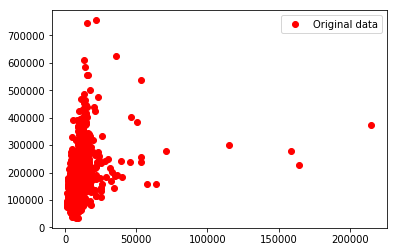

In [41]:
plt.plot(input_x, output_y, 'ro', label='Original data')
plt.legend()
plt.show()


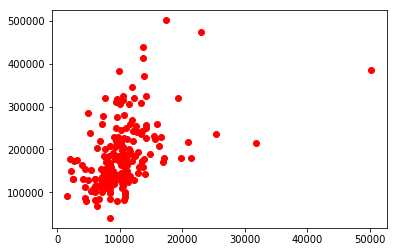

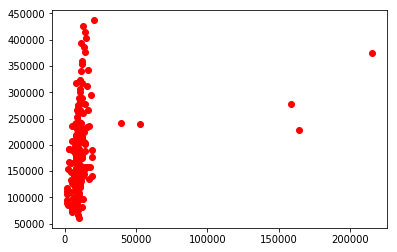

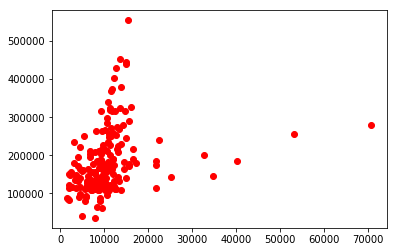

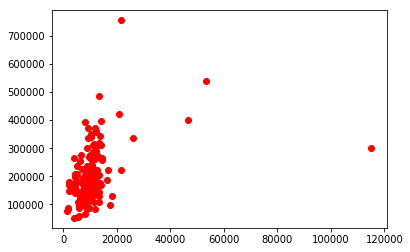

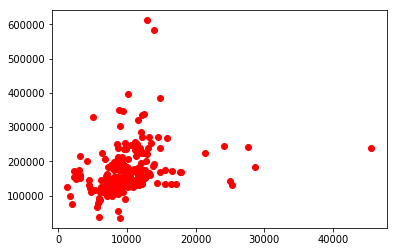

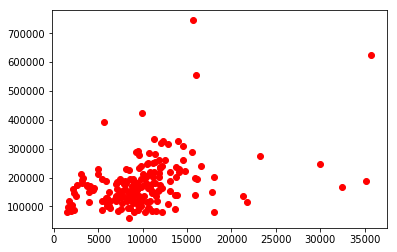

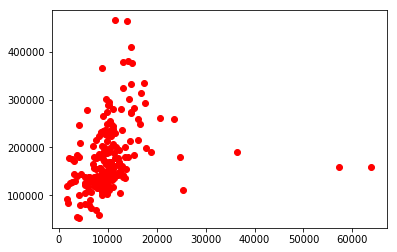

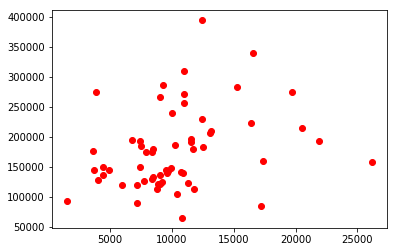

In [42]:
for i in range(0, 1460, 200):
    plt.figure()
    plt.plot(input_x[i:i+200], output_y[i:i+200], 'ro')
    plt.show()